In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [119]:
df=pd.read_csv("titanic_toy.csv")

In [120]:
df.head(2)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [122]:
df.shape

(891, 4)

In [123]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [124]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [125]:
# we can use imuter on age , fare

In [ ]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [127]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [128]:
age_mean=X_train["Age"].mean()

In [129]:
age_median=X_train["Age"].median()
fare_mean=X_train['Fare'].mean()
fare_median=X_train['Fare'].median()

In [131]:
age_mean

29.78590425531915

In [132]:
X_train["Age"].median()

28.75

In [133]:
X_train['Age'].mean()

29.78590425531915

In [134]:
X_train['Age_median'] = X_train['Age'].fillna(age_median)
X_train['Age_mean']= X_train['Age'].fillna(age_mean)
X_train['Fare_median']= X_train['Fare'].fillna(fare_median)
X_train['Fare_mean']= X_train['Fare'].fillna(fare_mean)

In [135]:
X_train.head(10)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
30,40.0,27.7208,0,40.00,40.000000,27.7208,27.7208
10,4.0,16.7000,2,4.00,4.000000,16.7000,16.7000
873,47.0,9.0000,0,47.00,47.000000,9.0000,9.0000
182,9.0,31.3875,6,9.00,9.000000,31.3875,31.3875
876,20.0,9.8458,0,20.00,20.000000,9.8458,9.8458
213,30.0,13.0000,0,30.00,30.000000,13.0000,13.0000
157,30.0,8.0500,0,30.00,30.000000,8.0500,8.0500
780,13.0,7.2292,0,13.00,13.000000,7.2292,7.2292
572,36.0,26.3875,0,36.00,36.000000,26.3875,26.3875
77,NaN,8.0500,0,28.75,29.785904,8.0500,8.0500


In [136]:
X_train.isnull().sum()

Age            148
Fare            36
Family           0
Age_median       0
Age_mean         0
Fare_median      0
Fare_mean        0
dtype: int64

In [137]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


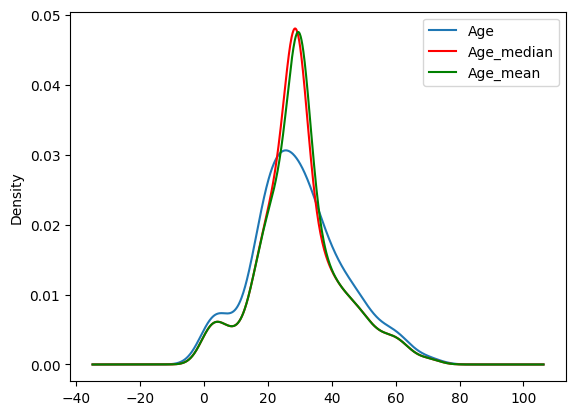

In [138]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

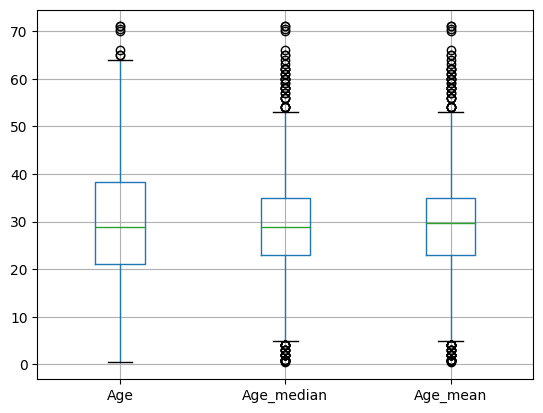

In [139]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

In [ ]:
# but we should not apply simple imputer on age column because  distribution is changed and outliers come

In [ ]:
# now we can drop age and fare

In [ ]:
# using sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df1=pd.read_csv("titanic_toy.csv")

In [ ]:
df1.head(50)

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
5,NaN,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,4,0
8,27.0,11.1333,2,1
9,14.0,30.0708,1,1


In [ ]:
X = df1.drop(columns=['Survived'])
y = df1['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [113]:
X_train.head(10)

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
213,30.0,13.0000,0
157,30.0,8.0500,0
780,13.0,7.2292,0
572,36.0,26.3875,0
77,NaN,8.0500,0


In [ ]:
X_train["Age"].median()

28.75

In [ ]:
X_train["Fare"].mean()

32.61759689349112

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [99]:
trf.named_transformers_['imputer1'].statistics_



array([28.75])

In [100]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [ ]:
X_train[:10]

array([[40.    , 27.7208,  0.    ],
       [ 4.    , 16.7   ,  2.    ],
       [47.    ,  9.    ,  0.    ],
       [ 9.    , 31.3875,  6.    ],
       [20.    ,  9.8458,  0.    ],
       [30.    , 13.    ,  0.    ],
       [30.    ,  8.05  ,  0.    ],
       [13.    ,  7.2292,  0.    ],
       [36.    , 26.3875,  0.    ],
       [28.75  ,  8.05  ,  0.    ]])

In [ ]:
df_X_train = pd.DataFrame(X_train)

In [114]:
df_X_train.head(10)

,0,1,2
0,40.00,27.7208,0.0
1,4.00,16.7000,2.0
2,47.00,9.0000,0.0
3,9.00,31.3875,6.0
4,20.00,9.8458,0.0
5,30.00,13.0000,0.0
6,30.00,8.0500,0.0
7,13.00,7.2292,0.0
8,36.00,26.3875,0.0
9,28.75,8.0500,0.0


In [ ]:
# but we should not apply simple imputer on age column because